train acc, test acc | 0.09035, 0.0892
train acc, test acc | 0.7810833333333334, 0.7862
train acc, test acc | 0.8775833333333334, 0.882
train acc, test acc | 0.8976, 0.9012
train acc, test acc | 0.90725, 0.91
train acc, test acc | 0.9145, 0.9178
train acc, test acc | 0.91965, 0.9223
train acc, test acc | 0.9235166666666667, 0.9261
train acc, test acc | 0.9270833333333334, 0.9292
train acc, test acc | 0.9309333333333333, 0.9325
train acc, test acc | 0.93415, 0.9348
train acc, test acc | 0.93645, 0.9361
train acc, test acc | 0.93895, 0.9378
train acc, test acc | 0.9413, 0.9391
train acc, test acc | 0.94265, 0.9411
train acc, test acc | 0.94465, 0.9423
train acc, test acc | 0.9464166666666667, 0.943


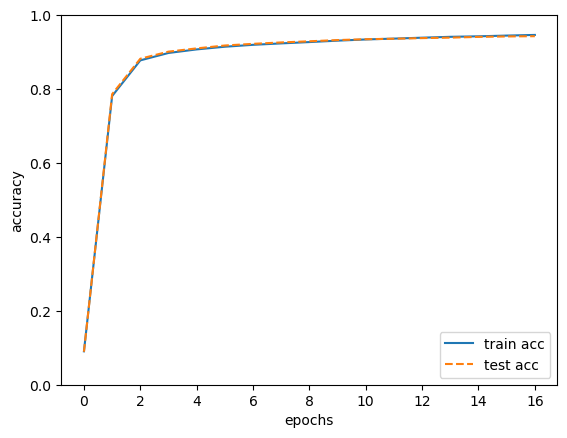

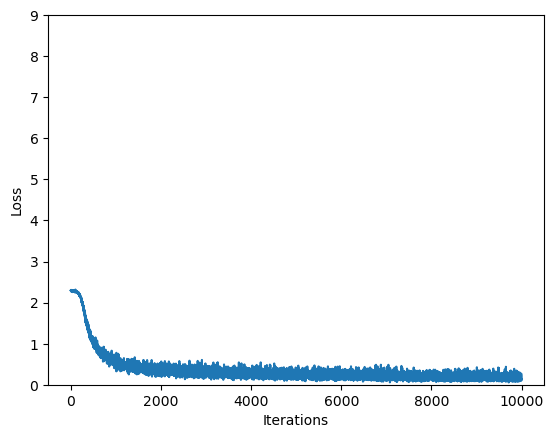

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from layer.two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')  
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 손실 함수 값의 추이 그래프
plt.plot(train_loss_list)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.ylim(0,9)
plt.show()

In [9]:
import tkinter as tk
from PIL import Image, ImageDraw
import numpy as np

# 사용자가 그림을 그릴 수 있는 GUI를 만듭니다.
class ImageGenerator:
    def __init__(self, parent, posx, posy, *kwargs):
        self.parent = parent
        self.posx = posx
        self.posy = posy
        self.sizex = 200
        self.sizey = 200
        self.b1 = "up"
        self.xold = None
        self.yold = None 
        self.drawing_area=tk.Canvas(self.parent,width=self.sizex,height=self.sizey)
        self.drawing_area.place(x=self.posx,y=self.posy)
        self.drawing_area.bind("<Motion>", self.motion)
        self.drawing_area.bind("<ButtonPress-1>", self.b1down)
        self.drawing_area.bind("<ButtonRelease-1>", self.b1up)
        self.button=tk.Button(self.parent,text="Done!",width=10,bg='white',command=self.save)
        self.button.place(x=self.sizex/7,y=self.sizey+20)
        self.image=Image.new("RGB",(200,200),(255,255,255))
        self.draw=ImageDraw.Draw(self.image)

    def save(self):
        self.image = self.image.resize((28, 28)).convert("L") # resize and convert to grayscale
        img_array = np.array(self.image)
        img_array = img_array.reshape(1, 784) # matching the model's input shape
        img_array = img_array.astype('float32')/255 # normalize
        prediction = network.predict(img_array) # network is your model
        print(f'Predicted digit: {np.argmax(prediction)}')

    def b1down(self,event):
        self.b1 = "down"

    def b1up(self,event):
        self.b1 = "up"
        self.xold = None
        self.yold = None

    def motion(self,event):
        if self.b1 == "down":
            if self.xold is not None and self.yold is not None:
                event.widget.create_line(self.xold,self.yold,event.x,event.y)
                self.draw.line(((self.xold,self.yold),(event.x,event.y)),(0,128,0),width=8)
        self.xold = event.x
        self.yold = event.y

if __name__ == "__main__":
    root=tk.Tk()
    root.wm_geometry("%dx%d+%d+%d" % (250, 250, 10, 10))
    root.config(bg='white')
    ImageGenerator(root,10,10)
    root.mainloop()

Predicted digit: 3
Predicted digit: 3
Predicted digit: 3
Predicted digit: 3
Predicted digit: 3
